## Bregman Divergence Example

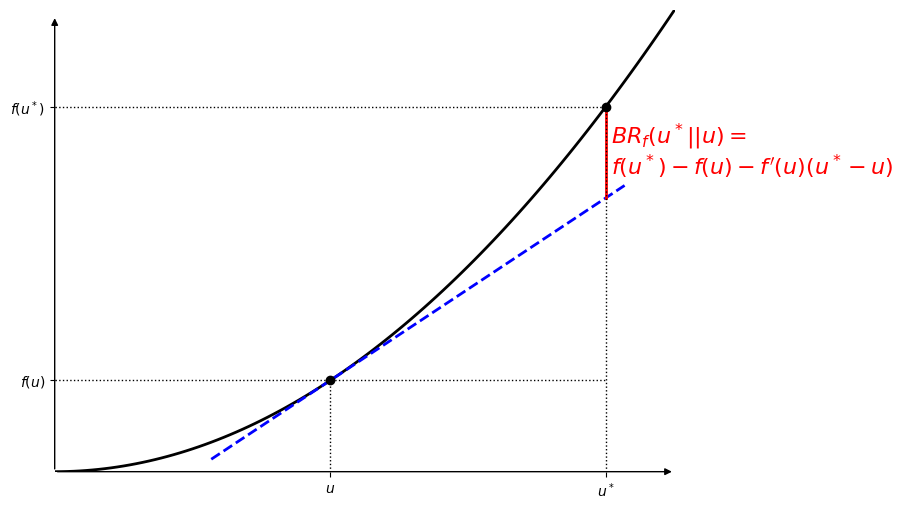

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def f_prime(x):
    return 2*x

x = np.linspace(0, 2.25, 100)
u1 = 1
u2 = 2

f_values = f(x)
tangent_line = f(u1) + f_prime(u1) * (x - u1)

plt.figure(figsize=(8, 6))
plt.plot(x, f_values, label=r"$f(x) = x^2$", linewidth=2, color='black')
plt.plot(x[25:92], tangent_line[25:92], '--', label=f"Tangent line at $u={u1}$", linewidth=2, color='blue')
plt.scatter(u1, f(u1), color='black', label=f"$u = {u1}$", zorder=5)
plt.scatter(u2, f(u2), color='black', label=f"$u^* = {u2}$", zorder=5)

x_fill = np.linspace(u1, u2, 100)

plt.plot([u2, u2], [f(u2) , f(u1) + f_prime(u1) * (u2 - u1)], '-', color='red', linewidth=2, label="Bregman Divergence Distance")
plt.text(u2 + 0.02, f(u2) - 0.4, f"$BR_f(u^* || u) = $", fontsize=16, color="red")
plt.text(u2 + 0.02, f(u2) - 0.75, f"$f(u^*) - f(u) - f'(u)(u^* - u)$", fontsize=16, color="red")

plt.plot([u1, u1], [0, f(u1)], color='black', linewidth=1, linestyle=':')
plt.plot([u2, u2], [0, f(u2)], color='black', linewidth=1, linestyle=':')
plt.plot([0, 2], [f(u1), f(u1)], color='black', linewidth=1, linestyle=':')
plt.plot([0, 2], [f(u2), f(u2)], color='black', linewidth=1, linestyle=':')

plt.xticks([u1, u2, ], [r"$u$", r"$u^*$",])
plt.yticks([f(u1), f(u2)], [f"$f(u)$", f"$f(u^*)$"])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().margins(x=0,  y=0)
plt.annotate('', xy=(2.25, 0), xytext=(0, 0),
             arrowprops=dict(facecolor='black', arrowstyle='-|>'))
plt.annotate('', xy=(0, 5), xytext=(0, 0),
             arrowprops=dict(facecolor='black', arrowstyle='-|>'))

plt.show()

## Positive Unlabeled Data Example

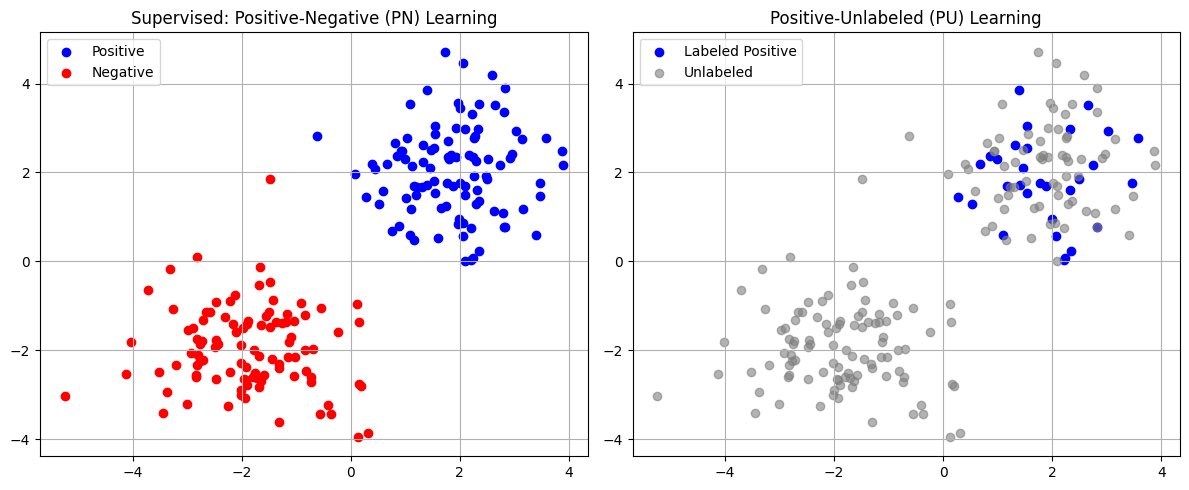

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
n_pos = 100
n_neg = 100

X_pos = np.random.randn(n_pos, 2) + np.array([2, 2])
X_neg = np.random.randn(n_neg, 2) + np.array([-2, -2])

# PU setting
n_labeled_pos = 30
X_pos_labeled = X_pos[:n_labeled_pos]
X_unlabeled = np.vstack([X_pos[n_labeled_pos:], X_neg])

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# PN
axs[0].scatter(X_pos[:, 0], X_pos[:, 1], color='blue', label='Positive')
axs[0].scatter(X_neg[:, 0], X_neg[:, 1], color='red', label='Negative')
axs[0].set_title('Supervised: Positive-Negative (PN) Learning')
axs[0].legend()
axs[0].grid(True)

# PU
axs[1].scatter(X_pos_labeled[:, 0], X_pos_labeled[:, 1], color='blue', label='Labeled Positive')
axs[1].scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], color='gray', alpha=0.6, label='Unlabeled')
axs[1].set_title('Positive-Unlabeled (PU) Learning')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Label Shift Example

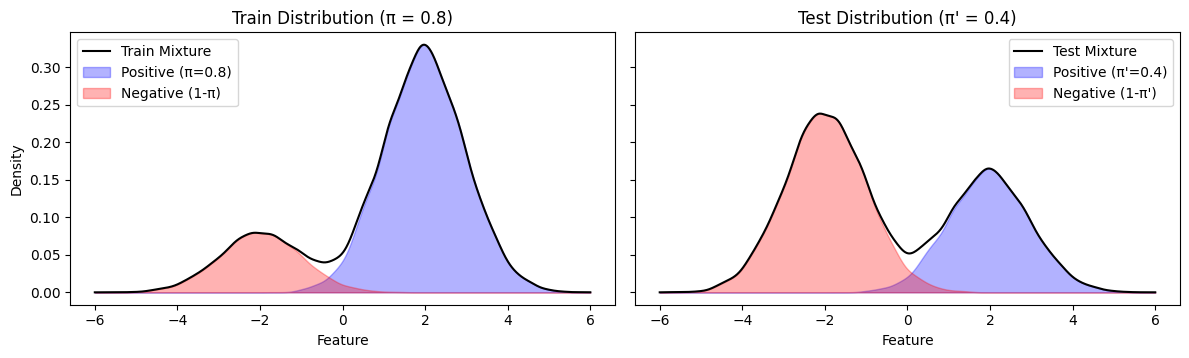

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate synthetic data
np.random.seed(0)
n = 10000
x_pos = np.random.normal(loc=2, scale=1, size=n)
x_neg = np.random.normal(loc=-2, scale=1, size=n)
x_grid = np.linspace(-6, 6, 1000)

# KDE estimates
kde_pos = gaussian_kde(x_pos)
kde_neg = gaussian_kde(x_neg)

p_pos = kde_pos(x_grid)
p_neg = kde_neg(x_grid)

pi_train = 0.8
p_train = pi_train * p_pos + (1 - pi_train) * p_neg

pi_test = 0.4
p_test = pi_test * p_pos + (1 - pi_test) * p_neg

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axs[0].plot(x_grid, p_train, label='Train Mixture', color='black')
axs[0].fill_between(x_grid, pi_train * p_pos, alpha=0.3, label='Positive (π=0.8)', color='blue')
axs[0].fill_between(x_grid, (1 - pi_train) * p_neg, alpha=0.3, label='Negative (1-π)', color='red')
axs[0].set_title("Train Distribution (π = 0.8)")
axs[0].set_xlabel("Feature")
axs[0].set_ylabel("Density")
axs[0].legend()

axs[1].plot(x_grid, p_test, label='Test Mixture', color='black')
axs[1].fill_between(x_grid, pi_test * p_pos, alpha=0.3, label="Positive (π'=0.4)", color='blue')
axs[1].fill_between(x_grid, (1 - pi_test) * p_neg, alpha=0.3, label="Negative (1-π')", color='red')
axs[1].set_title("Test Distribution (π' = 0.4)")
axs[1].set_xlabel("Feature")
axs[1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Sample Thresholds

In [7]:
import pandas as pd

pi_grid = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
thresholds_df = pd.DataFrame(columns=['pi', 'new_pi', 'threshold'])

for pi in pi_grid:
    for new_pi in pi_grid:
        threshold = (pi * (1 - new_pi)) / (pi + new_pi - 2 * pi * new_pi)
        thresholds_df = pd.concat([thresholds_df, pd.DataFrame({'pi': [pi], 'new_pi': [new_pi], 'threshold': [threshold]})], ignore_index=True)

thresholds_df_pivot = thresholds_df.pivot(index='pi', columns='new_pi', values='threshold')
thresholds_df_pivot.round(2)

new_pi,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
pi,,,,,,,,,
0.1,0.50,0.31,0.21,0.14,0.1,0.07,0.05,0.03,0.01
0.2,0.69,0.50,0.37,0.27,0.2,0.14,0.10,0.06,0.03
0.3,0.79,0.63,0.50,0.39,0.3,0.22,0.16,0.10,0.05
0.4,0.86,0.73,0.61,0.50,0.4,0.31,0.22,0.14,0.07
0.5,0.90,0.80,0.70,0.60,0.5,0.40,0.30,0.20,0.10
0.6,0.93,0.86,0.78,0.69,0.6,0.50,0.39,0.27,0.14
0.7,0.95,0.90,0.84,0.78,0.7,0.61,0.50,0.37,0.21
0.8,0.97,0.94,0.90,0.86,0.8,0.73,0.63,0.50,0.31
0.9,0.99,0.97,0.95,0.93,0.9,0.86,0.79,0.69,0.50
